## Лабораторная работа №1 | Вариант 5

Выполнил: Васильев Даниил

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [7]:
rgba = np.dtype([('R', np.uint8), ('G', np.uint8), ('B', np.uint8), ('A', np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [8]:
import warnings
warnings.filterwarnings("ignore")

4. Создайте случайный вектор размера 10 и отсортируйте его

In [9]:
np.sort(np.random.rand(10))

array([0.0855915 , 0.27778961, 0.28688567, 0.39031934, 0.45906518,
       0.46614024, 0.47453561, 0.6210204 , 0.85875272, 0.98862704])

5. Создайте read-only массив(неизменяемый)

In [18]:
np.arange(10).flags.writeable = False

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [16]:
cartesian_coords = np.random.rand(10, 2)

x = cartesian_coords[:, 0]
y = cartesian_coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

polar_coords = np.column_stack((r, theta))

print(polar_coords)

[[0.40283564 0.88045651]
 [1.05810435 1.15009763]
 [0.87130204 0.65904731]
 [0.26366929 0.38060568]
 [0.76709233 0.72918333]
 [1.05073151 0.46225689]
 [0.37982717 0.9177398 ]
 [1.19631519 0.60753577]
 [1.15619746 0.67033517]
 [0.64387591 1.48480017]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [19]:
num_points = 10 
coords = np.recarray(num_points, dtype=[('x', np.float64), ('y', np.float64)])

coords['x'] = np.random.rand(num_points)
coords['y'] = np.random.rand(num_points)

coords

rec.array([(0.31277359, 0.39254341), (0.06060634, 0.37610954),
           (0.12627883, 0.35612625), (0.06752712, 0.84253802),
           (0.19434819, 0.40894602), (0.11269024, 0.91768875),
           (0.57526403, 0.04881864), (0.47484753, 0.0723115 ),
           (0.33028436, 0.01887733), (0.77952116, 0.37557336)],
          dtype=[('x', '<f8'), ('y', '<f8')])

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [20]:
x = np.random.normal(size=5)
y = np.random.normal(size=5)
1 / (x[:, np.newaxis] - y[np.newaxis, :])

array([[  0.60195023,   2.51207922,   0.62900339,  -1.16658501,
        -12.62074328],
       [ -1.13535803,  -0.4664245 ,  -1.05016667,  -0.29418261,
         -0.38149287],
       [  1.02152328,  -3.51790508,   1.10195285,  -0.64954485,
         -1.31307462],
       [  0.48993183,   1.28549579,   0.50770444,  -2.09481336,
          3.32669409],
       [  0.76040549,  19.26874538,   0.80409287,  -0.83099135,
         -2.3506528 ]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [22]:
a = np.random.rand(5).astype(np.float32)
print(a)
a.dtype = np.int32
a

[0.18996242 0.02286522 0.2127552  0.3149486  0.43665433]


array([1044546946, 1018908633, 1046076544, 1050755313, 1054839080],
      dtype=int32)

10. Как случайно заменить p элементов в 2D массиве?

In [23]:
array_2d = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

p = 4

rows, cols = array_2d.shape
random_indices = np.random.choice(rows * cols, size=p, replace=False)

random_rows = random_indices // cols
random_cols = random_indices % cols

new_values = np.random.randint(10, 20, size=p)  # Новые значения для замены
array_2d[random_rows, random_cols] = new_values
array_2d

array([[ 1,  2,  3],
       [ 4, 10,  6],
       [15, 18, 14]])

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('data.csv')

1. Узнайте сколько было на борту человек

In [27]:
df.shape[0]

891

2. Какой медианный и средний возраста пассажиров

In [29]:
df['Age'].median(), df['Age'].mean()

(28.0, 29.69911764705882)

3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [36]:
df[(df['Age'] < 16) & (df['Survived'] == 1)].shape[0] / df[df['Age'] < 16].shape[0] * 100, df[(df['Age'] >= 16) & (df['Survived'] == 1)].shape[0] / df[df['Age'] >= 16].shape[0] * 100 

(59.036144578313255, 38.193343898573694)

4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [39]:
df[((df['Age'] < 18) | (df['Sex'] == 'female')) & (df['Survived'] == 1)].shape[0] / df[(df['Age'] < 18) | (df['Sex'] == 'female')].shape[0] * 100 > df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0] / df[df['Sex'] == 'male'].shape[0] * 100

True

5. Зависит ли выживаемость от класса обслуживания?

In [45]:
df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

6. Посчитайте средний возраст умерших женщин и мужчин

In [47]:
df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'].mean(), df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'].mean(), 

(31.618055555555557, 25.046875)

7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [49]:
not_alone = df[df['SibSp'] + df['Parch'] >= 1]
alone = df[df['SibSp'] + df['Parch'] < 1]

not_alone[not_alone['Survived'] == 1].shape[0] / not_alone.shape[0] * 100, alone[alone['Survived'] == 1].shape[0] / alone.shape[0] * 100

(50.56497175141242, 30.353817504655495)

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [50]:
df[df['Survived'] == 1]['Fare'].mean(), df[df['Survived'] == 0]['Fare'].mean()

(48.39540760233918, 22.117886885245902)

9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [51]:
df[df['Pclass'] == 2]['Age'].max(), df[df['Pclass'] == 2]['Age'].min()

(70.0, 0.67)

10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [55]:
young_men = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] <= 30)]
older_men = df[(df['Sex'] == 'male') & (df['Age'] > 30)]

young_men[young_men['Survived'] == 1].shape[0] / young_men.shape[0] * 100 > older_men[older_men['Survived'] == 1].shape[0] / older_men.shape[0] * 100

False

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возростов пассажиров

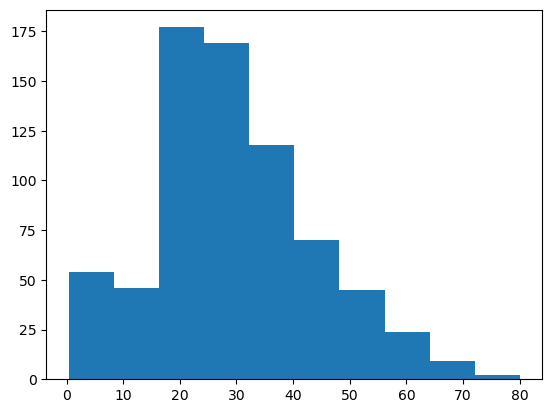

In [56]:
plt.hist(df['Age'])
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

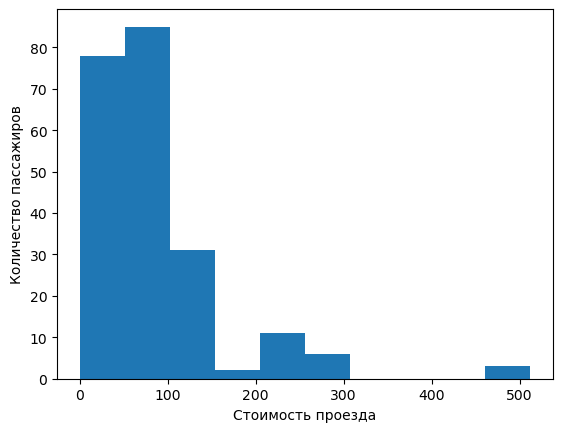

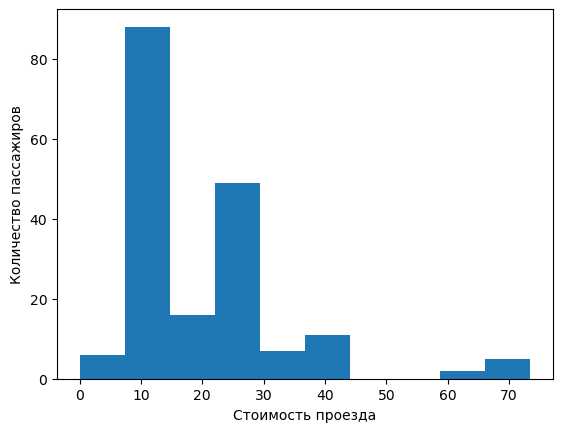

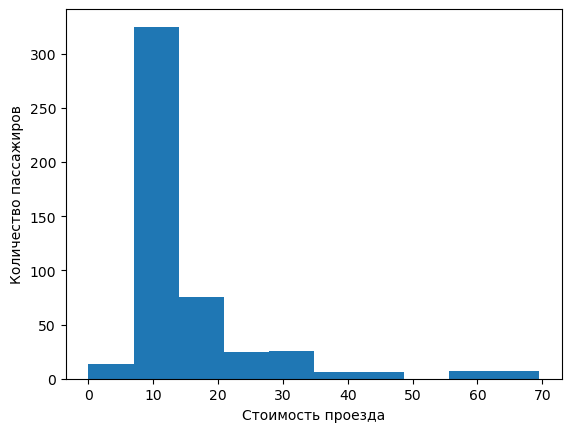

In [61]:
for i in range(1, 4):
    plt.hist(df[df['Pclass'] == i]['Fare'].dropna())
    plt.xlabel('Стоимость проезда')
    plt.ylabel('Количество пассажиров')
    plt.show()

3. Постройте зависимость цены от возраста пассажира

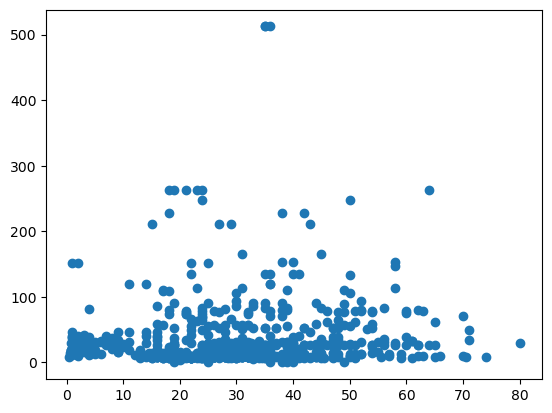

In [64]:
plt.scatter(df['Age'], df['Fare'])
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

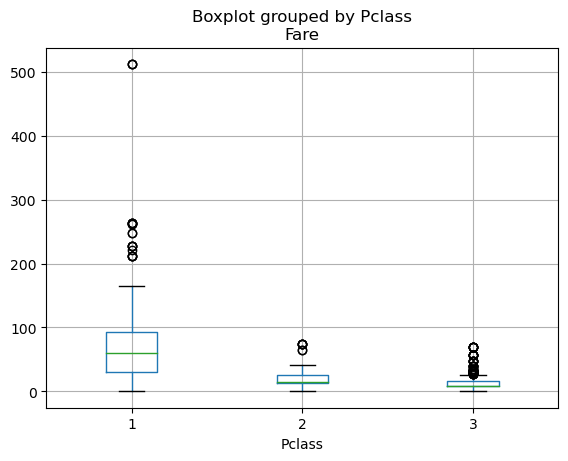

In [65]:
df.boxplot(column='Fare', by='Pclass')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

<AxesSubplot: xlabel='Category'>

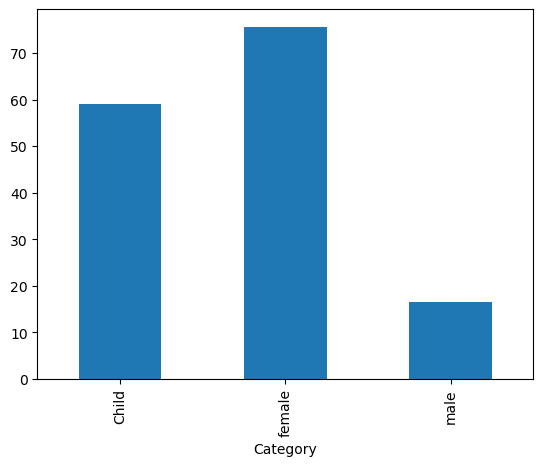

In [75]:
df['Category'] = df.apply(lambda row: 'child' if row['Age'] < 16 else row['Sex'], axis=1)
(df.groupby('Category')['Survived'].mean() * 100).plot(kind='bar')

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

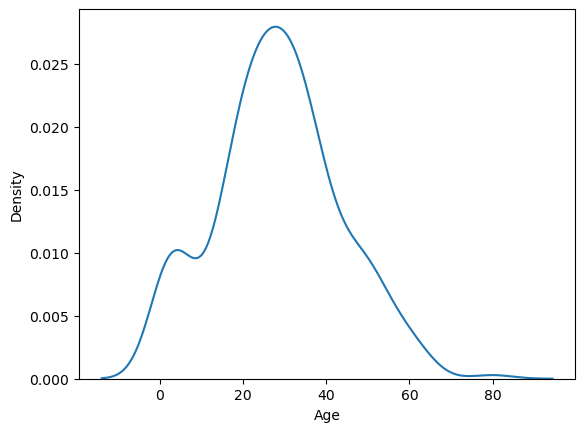

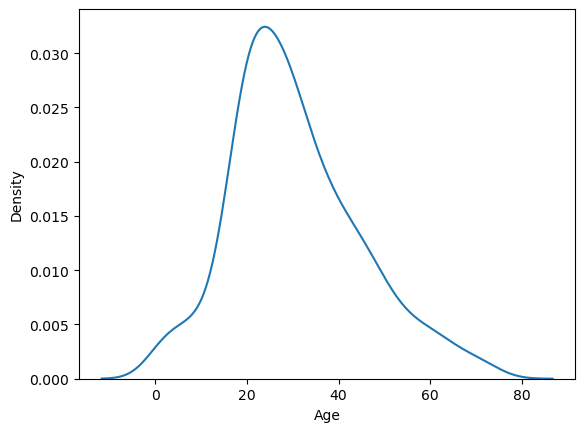

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category


In [80]:
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna())
plt.show()
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna())
plt.show()

# вывод: на корабле было много 20-30 летних, престарелые люди не выжили, детей спасали первыми

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

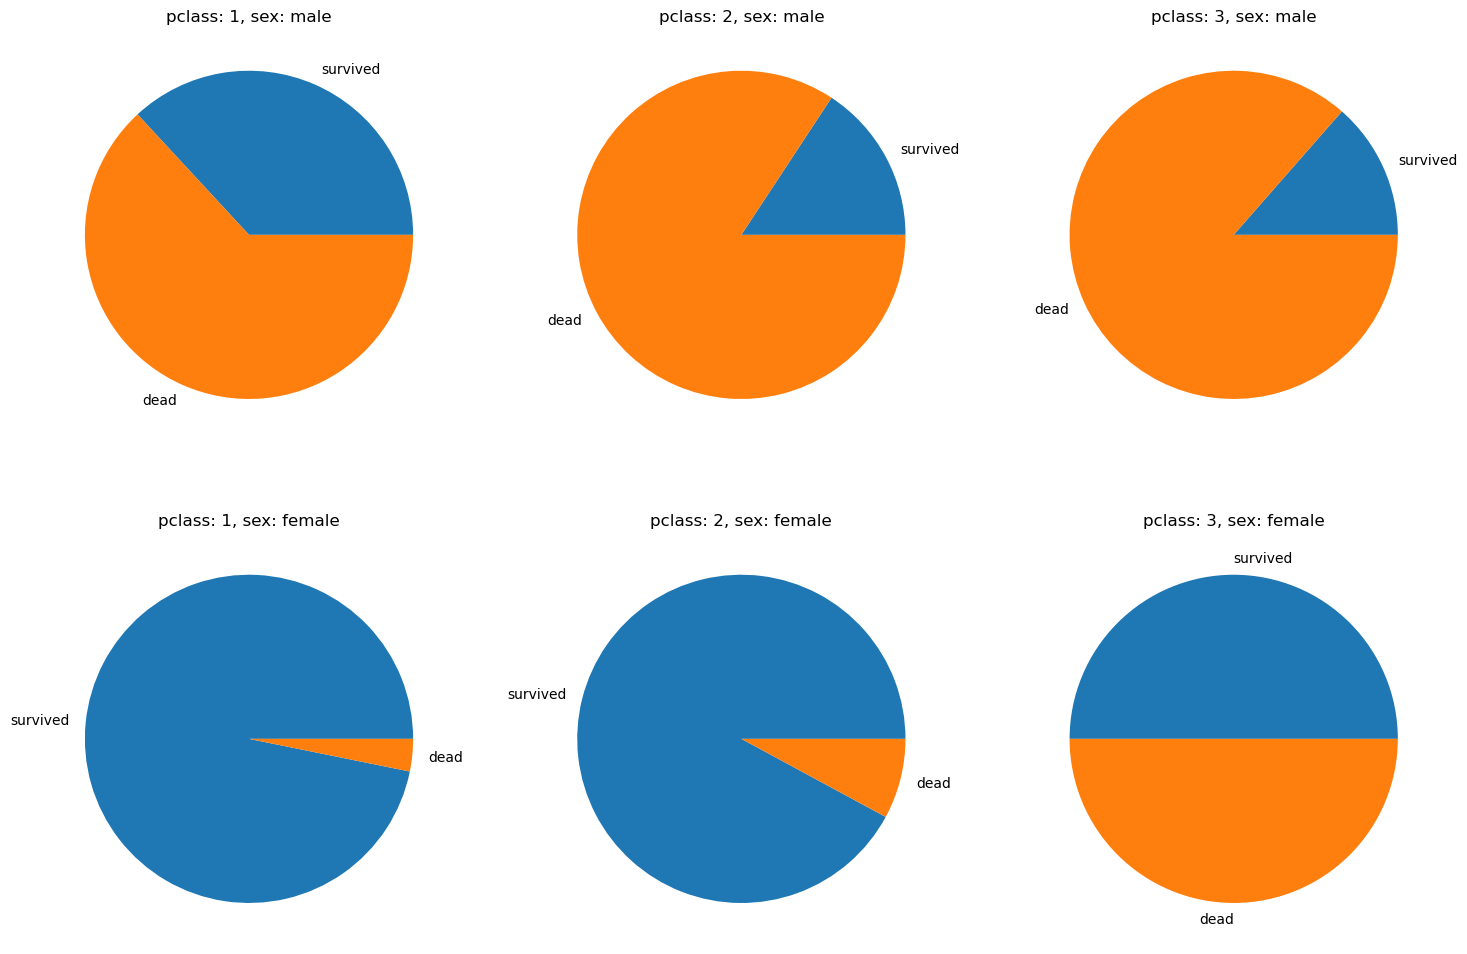

In [79]:
survival_by_class_sex = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)

# Вычисление процентов выживших и умерших
survival_by_class_sex['Survived_Percent'] = survival_by_class_sex[1] / (survival_by_class_sex[0] + survival_by_class_sex[1]) * 100
survival_by_class_sex['Deceased_Percent'] = survival_by_class_sex[0] / (survival_by_class_sex[0] + survival_by_class_sex[1]) * 100

# Создание круговой диаграммы
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, pclass in enumerate([1, 2, 3]):
    for j, sex in enumerate(['male', 'female']):
        ax = axes[j, i]
        data = survival_by_class_sex.loc[(pclass, sex)]
        ax.pie(data[['Survived_Percent', 'Deceased_Percent']].values.flatten(), labels=['survived', 'dead'])
        ax.set_title(f'pclass: {pclass}, sex: {sex}')

plt.show()